# Iterator Check

The songs need to be filled with song analytics. For this purpose I've created a spotify_ids iterator. This iterator needs to have 100 songs for each hot 100 week (at the time of writing/scraping this was 3152 (or 315200 songs).

In [1]:
import os
import pandas as pd

%cd ../data/iterators
%ls

/Users/sebastian/git_repos/data_science/hit_predictor/data/iterators
hot100.csv              interim_iter.csv        spotify_ids_filled.csv
hot100_songs.csv        spotify_ids.csv         week_saturday.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_spotify_ids = pd.read_csv('spotify_ids.csv',sep='\t')
df_spotify_ids.head()

,iterator,filename,artist,title,spotify_artist,spotify_title,verified
0,NaN,./data/interim/hot100/hot100_1967-07-03.csv,The Parliaments,(I Wanna) Testify,NaN,NaN,NaN
1,59IxJQuFPmW4Xvy7GynZDF,./data/interim/hot100/hot100_1967-07-03.csv,Four Tops,7 Rooms Of Gloom,Four Tops,7-Rooms Of Gloom,False
2,1cmjxqobVTrgAiJ0btAleN,./data/interim/hot100/hot100_1967-07-03.csv,Procol Harum,A Whiter Shade Of Pale,Procol Harum,A Whiter Shade of Pale - Original Single Version,False
3,NaN,./data/interim/hot100/hot100_1967-07-03.csv,Marvin Gaye & Tammi Terrell,Ain't No Mountain High Enough,NaN,NaN,NaN
4,NaN,./data/interim/hot100/hot100_1967-07-03.csv,The Royal Guardsmen,Airplane Song (My Airplane),NaN,NaN,NaN


In [4]:
# Check if all files were scraped (should be 3152)
print('Number of unique filenames: {}'.format(len(df_spotify_ids['filename'].unique())))

# Check for total number of observations (should be 315200)
print('Number of observations: {}'.format(len(df_spotify_ids)))

Number of unique filenames: 3152
Number of observations: 315200


All files were checked and scraped.

Since the filenames correspond to actual dates we'll index them as such.

In [5]:
df_spotify_ids.loc[:,'date'] =pd.to_datetime(df_spotify_ids.loc[:,'filename'].str[-14:-4], format='%Y-%m-%d')
df_spotify_ids.set_index('date',inplace=True,drop=True)
df_spotify_ids.head()

,iterator,filename,artist,title,spotify_artist,spotify_title,verified
date,,,,,,,
1967-07-03,NaN,./data/interim/hot100/hot100_1967-07-03.csv,The Parliaments,(I Wanna) Testify,NaN,NaN,NaN
1967-07-03,59IxJQuFPmW4Xvy7GynZDF,./data/interim/hot100/hot100_1967-07-03.csv,Four Tops,7 Rooms Of Gloom,Four Tops,7-Rooms Of Gloom,False
1967-07-03,1cmjxqobVTrgAiJ0btAleN,./data/interim/hot100/hot100_1967-07-03.csv,Procol Harum,A Whiter Shade Of Pale,Procol Harum,A Whiter Shade of Pale - Original Single Version,False
1967-07-03,NaN,./data/interim/hot100/hot100_1967-07-03.csv,Marvin Gaye & Tammi Terrell,Ain't No Mountain High Enough,NaN,NaN,NaN
1967-07-03,NaN,./data/interim/hot100/hot100_1967-07-03.csv,The Royal Guardsmen,Airplane Song (My Airplane),NaN,NaN,NaN


We'll remove any duplicates by artist AND title and retrieve how many spotify ids are missing.

In [6]:
unique_songs = df_spotify_ids.drop_duplicates(subset=['artist','title']).copy()
print('Number of unique songs: {}'.format(len(unique_songs)))
unidentified_songs = unique_songs.loc[unique_songs['iterator'].isnull(),:].copy()
print('Number of unidentified unique songs: {}'.format(len(unidentified_songs)))

Number of unique songs: 28021
Number of unidentified unique songs: 8583


In [7]:
unique_songs['identified'] = ~unique_songs['iterator'].isnull()
identified_by_year = unique_songs['identified'].resample("A")

proportions_by_year = pd.DataFrame()
proportions_by_year['identified'] = identified_by_year.sum()
proportions_by_year['total'] = identified_by_year.count()
proportions_by_year['proportion'] = proportions_by_year['identified'] / proportions_by_year['total']
proportions_by_year.head()

,identified,total,proportion
date,,,
1958-12-31,171.0,283,0.604240
1959-12-31,323.0,552,0.585145
1960-12-31,395.0,638,0.619122
1961-12-31,471.0,720,0.654167
1962-12-31,443.0,656,0.675305


/Users/sebastian/anaconda3/envs/hit_predictor/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


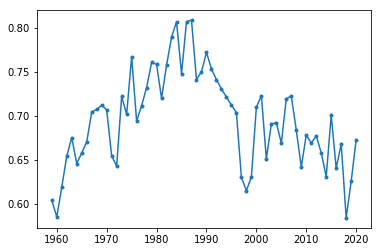

In [8]:
plt.plot(proportions_by_year.index,proportions_by_year['proportion'],marker='.')

In [9]:
unidentified_songs.head()

,iterator,filename,artist,title,spotify_artist,spotify_title,verified
date,,,,,,,
1967-07-03,NaN,./data/interim/hot100/hot100_1967-07-03.csv,The Parliaments,(I Wanna) Testify,NaN,NaN,NaN
1967-07-03,NaN,./data/interim/hot100/hot100_1967-07-03.csv,Marvin Gaye & Tammi Terrell,Ain't No Mountain High Enough,NaN,NaN,NaN
1967-07-03,NaN,./data/interim/hot100/hot100_1967-07-03.csv,The Royal Guardsmen,Airplane Song (My Airplane),NaN,NaN,NaN
1967-07-03,NaN,./data/interim/hot100/hot100_1967-07-03.csv,J.J. Barnes,Baby Please Come Back Home,NaN,NaN,NaN
1967-07-03,NaN,./data/interim/hot100/hot100_1967-07-03.csv,Davie Allan And The Arrows,Blue's Theme,NaN,NaN,NaN


There is quite a few unidentified songs (8583 unidentified). We'll try to reduce the number of these unidentified songs by widening the search criteria slightly. We'll drop "track:" and "artist:" keywords. To make sure that we're not by accident importing a cover or a title with the same name but different artist we'll need to double check these imports in the wrangling stage. 

NOTE: The iterator has been adjusted to drop "track:" and "artist:" keywords right away so you shouldn't have to run into these issue if you're scraping the project data yourself.

In [10]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

try:
    client_credentials_manager = SpotifyClientCredentials(client_id=ENTER_CLIENT_ID, client_secret=ENTER_CLIENT_SECRET)
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
except:
    print("ENTER YOUR SPOTIFY CREDENTIALS")

ENTER YOUR SPOTIFY CREDENTIALS


In [11]:
import time as tm
import random

unique_songs_fill = df_spotify_ids.drop_duplicates(subset=['artist','title']).copy()
unidentified_songs_fill = unique_songs_fill.loc[unique_songs_fill['iterator'].isnull(),:]
unidentified_songs_fill.tail(5)

if os.path.exists('interim_iter.csv'):
    updated_songs_fill = pd.read_csv('interim_iter.csv',sep='\t')
    start = len(updated_songs_fill)
else:
    updated_songs_fill = pd.DataFrame(columns=unidentified_songs_fill.columns)
    start = 0

save_count = 0
iteration = 0
for i, row in enumerate(unidentified_songs_fill.iloc[start:len(unidentified_songs_fill)].iterrows()):
    values = row[1]
    filename = values[1]
    artist = values[2]
    track = values[3]
    q = track + ' ' + artist
    print(q)
    tracks = sp.search(q=q, type='track',market='US')
    print(tracks)
    try:
        items = tracks['tracks']['items']
        spotify_id = items[0]['id']
        spotify_title = items[0]['name']
        spotify_artist = ' & '.join(list([artist['name'] for artist in items[0]['album']['artists']]))
        verified = (track == spotify_title) and (artist == spotify_artist)
        row_dict = {'iterator':spotify_id ,'filename': filename,'artist':artist ,'title':track ,'spotify_artist':spotify_artist ,'spotify_title':spotify_title ,'verified':verified}
        print("We found **{}** by __{}__ for *{}* by _{}_".format(tracks['tracks']['items'][0]['name'],tracks['tracks']['items'][0]['artists'][0]['name'],track,artist))
    except:
        row_dict = {'iterator':'' ,'filename': filename,'artist':artist ,'title':track ,'spotify_artist':'' ,'spotify_title':'' ,'verified':''}
        print('No Entry found for {} {}'.format(track,artist))
    updated_songs_fill = updated_songs_fill.append(row_dict,ignore_index=True)
    save_count += 1
    if save_count >= 10:
        updated_songs_fill.to_csv('interim_iter.csv',sep='\t',index=False,encoding='utf-8')
        save_count = 0
        print(len(updated_songs_fill))
    if random.random() > 0.99:
        sec_sleep = random.random() * 3
        print('long sleep {}'.format(sec_sleep))
        tm.sleep(sec_sleep)

updated_songs_fill.to_csv('interim_iter.csv',sep='\t',index=False,encoding='utf-8')

In [12]:
updated_songs_fill.tail(5)

,iterator,filename,artist,title,spotify_artist,spotify_title,verified
8578,NaN,./data/interim/hot100/hot100_1966-01-24.csv,Sam & Bill,Fly Me To The Moon,NaN,NaN,NaN
8579,NaN,./data/interim/hot100/hot100_1966-01-24.csv,Andre Williams & His Orch.,Rib Tip's (Part 1),NaN,NaN,NaN
8580,0S7zWNZ6bjlG53SrVLcVsQ,./data/interim/hot100/hot100_1958-08-11.csv,Johnny Cash And The Tennessee Two,Come In Stranger,Johnny Cash,Come in Stranger,False
8581,NaN,./data/interim/hot100/hot100_1958-08-11.csv,Tennessee Ernie Ford,Sunday Barbecue,NaN,NaN,NaN
8582,NaN,./data/interim/hot100/hot100_2015-12-28.csv,Jordan Smith & Adam Levine,God Only Knows,NaN,NaN,NaN


In [13]:
# Left join the new songs
filled_unique_songs = df_spotify_ids.merge(updated_songs_fill,how='left',on=['artist','title','filename'])

# Replace NA columns with y values
filled_unique_songs['iterator_x'] = filled_unique_songs['iterator_x'].fillna(filled_unique_songs['iterator_y'])
filled_unique_songs['verified_x'] = filled_unique_songs['verified_x'].fillna(filled_unique_songs['verified_y'])
filled_unique_songs['spotify_title_x'] = filled_unique_songs['spotify_title_x'].fillna(filled_unique_songs['spotify_title_y'])
filled_unique_songs['spotify_artist_x'] = filled_unique_songs['spotify_artist_x'].fillna(filled_unique_songs['spotify_artist_y'])

# Drop redundant y columns
filled_unique_songs = filled_unique_songs.drop('iterator_y',axis=1)
filled_unique_songs = filled_unique_songs.drop('verified_y',axis=1)
filled_unique_songs = filled_unique_songs.drop('spotify_title_y',axis=1)
filled_unique_songs = filled_unique_songs.drop('spotify_artist_y',axis=1)

# Rename columns
filled_unique_songs.columns = ['iterator','filename','artist','title','spotify_artist','spotify_title','verified']
filled_unique_songs.to_csv('spotify_ids_filled.csv',sep='\t',index=False,encoding='utf-8')

filled_unique_songs.head()

,iterator,filename,artist,title,spotify_artist,spotify_title,verified
0,NaN,./data/interim/hot100/hot100_1967-07-03.csv,The Parliaments,(I Wanna) Testify,NaN,NaN,NaN
1,59IxJQuFPmW4Xvy7GynZDF,./data/interim/hot100/hot100_1967-07-03.csv,Four Tops,7 Rooms Of Gloom,Four Tops,7-Rooms Of Gloom,False
2,1cmjxqobVTrgAiJ0btAleN,./data/interim/hot100/hot100_1967-07-03.csv,Procol Harum,A Whiter Shade Of Pale,Procol Harum,A Whiter Shade of Pale - Original Single Version,False
3,30nBdjVsKGchhjSy89mv2N,./data/interim/hot100/hot100_1967-07-03.csv,Marvin Gaye & Tammi Terrell,Ain't No Mountain High Enough,Various Artists,Ain't No Mountain High Enough,False
4,NaN,./data/interim/hot100/hot100_1967-07-03.csv,The Royal Guardsmen,Airplane Song (My Airplane),NaN,NaN,NaN


In [14]:
df_spotify_ids_filled = pd.read_csv('spotify_ids_filled.csv',sep='\t')

In [15]:
df_spotify_ids_filled.loc[:,'date'] =pd.to_datetime(df_spotify_ids_filled.loc[:,'filename'].str[-14:-4], format='%Y-%m-%d')
df_spotify_ids_filled.set_index('date',inplace=True,drop=True)
df_spotify_ids_filled.head()

,iterator,filename,artist,title,spotify_artist,spotify_title,verified
date,,,,,,,
1967-07-03,NaN,./data/interim/hot100/hot100_1967-07-03.csv,The Parliaments,(I Wanna) Testify,NaN,NaN,NaN
1967-07-03,59IxJQuFPmW4Xvy7GynZDF,./data/interim/hot100/hot100_1967-07-03.csv,Four Tops,7 Rooms Of Gloom,Four Tops,7-Rooms Of Gloom,False
1967-07-03,1cmjxqobVTrgAiJ0btAleN,./data/interim/hot100/hot100_1967-07-03.csv,Procol Harum,A Whiter Shade Of Pale,Procol Harum,A Whiter Shade of Pale - Original Single Version,False
1967-07-03,30nBdjVsKGchhjSy89mv2N,./data/interim/hot100/hot100_1967-07-03.csv,Marvin Gaye & Tammi Terrell,Ain't No Mountain High Enough,Various Artists,Ain't No Mountain High Enough,False
1967-07-03,NaN,./data/interim/hot100/hot100_1967-07-03.csv,The Royal Guardsmen,Airplane Song (My Airplane),NaN,NaN,NaN


In [16]:
unique_songs_filled = df_spotify_ids_filled.drop_duplicates(subset=['artist','title']).copy()
print('Number of unique songs: {}'.format(len(unique_songs_filled)))
unidentified_songs_filled = unique_songs_filled.loc[unique_songs_filled['iterator'].isnull(),:].copy()
print('Number of unidentified unique songs: {}'.format(len(unidentified_songs_filled)))

Number of unique songs: 28021
Number of unidentified unique songs: 5727


The number of unidentified songs dropped to 5727, which is still quite a large number but we were able to reduce the unidentified songs by 2856 songs.

In [17]:
unique_songs_filled['identified'] = ~unique_songs_filled['iterator'].isnull()
unique_songs_filled['year'] = unique_songs_filled.index.year
identified_by_year_filled = unique_songs_filled.loc[:,['identified','year']].groupby('year')

proportions_by_year_filled = identified_by_year_filled.sum()
proportions_by_year_filled['total'] = identified_by_year_filled.count()
proportions_by_year_filled['proportion'] = proportions_by_year_filled['identified'] / proportions_by_year_filled['total']
proportions_by_year_filled.head()

,identified,total,proportion
year,,,
1958,187.0,283,0.660777
1959,367.0,552,0.664855
1960,448.0,638,0.702194
1961,544.0,720,0.755556
1962,509.0,656,0.775915


In [18]:
unique_songs_filled['identified'] = ~unique_songs_filled['iterator'].isnull()
identified_by_year_filled = unique_songs_filled['identified'].resample("A")

proportions_by_year_filled = pd.DataFrame()
proportions_by_year_filled['identified'] = identified_by_year_filled.sum()
proportions_by_year_filled['total'] = identified_by_year_filled.count()
proportions_by_year_filled['proportion'] = proportions_by_year_filled['identified'] / proportions_by_year_filled['total']
proportions_by_year_filled.head()

,identified,total,proportion
date,,,
1958-12-31,187.0,283,0.660777
1959-12-31,367.0,552,0.664855
1960-12-31,448.0,638,0.702194
1961-12-31,544.0,720,0.755556
1962-12-31,509.0,656,0.775915


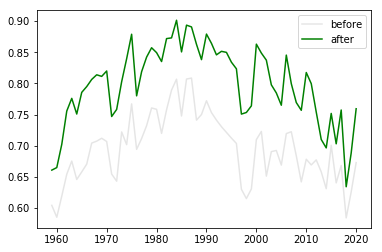

In [19]:
_ = plt.plot(proportions_by_year.index,proportions_by_year['proportion'],label='before',color='gray',alpha=0.2)
_ = plt.plot(proportions_by_year_filled.index,proportions_by_year_filled['proportion'],label='after',color='green')
_ = plt.legend()

As can be seen we're seeing quite a big improvement in the proportion of songs that are successfully identified to before.